1. 决策树可视化

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from fontTools.misc.symfont import printGreenPen

warnings.filterwarnings("ignore")

# ---------------- 读取数据 ----------------
file_name = "D:/MyProject/MatContest/dataset/raw/yf2014_2018.csv" # 定义要读取的 CSV 文件路径
dataset = pd.read_csv(file_name)
dataset.head()  # 显示前五行数据

,Close,High,Low,Open,Volume
0,3.95,3.98,3.84,3.85,20548400
1,4.00,4.00,3.88,3.98,22887200
2,4.13,4.18,3.99,4.01,42398300
3,4.18,4.25,4.11,4.19,42932100
4,4.18,4.26,4.14,4.23,30678700


In [6]:
# 添加特征列：涨跌分类
# shift(-1)——把 Volume 列向上移动 1 行，表示下一天的成交量
# np.where(条件, 值1, 值2)——如果条件为真返回 1，否则返回 0
# 逻辑：如果下一天成交量 > 今天成交量，标记 1，否则 0
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'], 1, 0)

# 添加特征列：开盘价买卖信号
# 逻辑：如果下一天开盘价 > 今天开盘价，标记 1，否则 0
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'], 1, 0)

# 添加特征列：收盘价买卖信号
# 逻辑：如果下一天收盘价 > 今天收盘价，标记 1，否则 0
dataset['Buy_Sell'] = np.where(dataset['Close'].shift(-1) > dataset['Close'], 1, 0)

# 计算收益率
# .pct_change()——计算相邻两天 Close（收盘价）的百分比变化
# a——今天收盘价  b——昨天收盘价
# a - b / b
dataset['Returns'] = dataset['Close'].pct_change()
dataset = dataset.dropna()  # 删除包含 NaN 的行，保证后续建模不出错
dataset.tail()  # 显示后 5 行数据，检查处理后的数据情况

,Close,High,Low,Open,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
1166,19.980000,20.08,19.350000,19.790001,62983200,0,1,1,0.010622
1167,20.400000,20.42,19.860001,19.980000,55629000,1,1,1,0.021021
1168,20.900000,20.92,20.209999,20.280001,62002700,1,1,1,0.024510
1169,22.290001,22.32,21.139999,21.190001,113444100,1,1,1,0.066507
1170,23.980000,24.00,22.670000,22.910000,164328200,0,0,0,0.075819


In [14]:
from sklearn.tree import DecisionTreeClassifier # 用于构建分类决策树模型的类
from IPython.display import Image   # 用来在 Jupyter Notebook 或其他 IPython 环境中显示图片。
from sklearn import tree    # tree 模块里包含绘制决策树图形（如 tree.plot_tree）和导出决策树结构（如 tree.export_graphviz）等工具。
import pydotplus    # 导入 pydotplus 库，它是 Graphviz 的 Python 接口

In [24]:
# 从 dataset 这个 DataFrame 中删除名为 'Buy_Sell' 的列，将剩下的所有列作为 X
# 删除 Buy_Sell 是因为这是你要预测的目标值，不应该当作输入特征
X = dataset.drop(['Buy_Sell'], axis = 1)

# 从 dataset 中单独取出 'Buy_Sell' 这一列作为 y
# y 是 标签（目标值）向量，代表每条数据对应的分类结果
y = dataset['Buy_Sell']
X.head()

,Close,High,Low,Open,Volume,Increase_Decrease,Buy_Sell_on_Open,Returns
1,4.00,4.00,3.88,3.98,22887200,1,1,0.012658
2,4.13,4.18,3.99,4.01,42398300,1,1,0.032500
3,4.18,4.25,4.11,4.19,42932100,0,1,0.012106
4,4.18,4.26,4.14,4.23,30678700,0,0,0.000000
5,4.09,4.23,4.05,4.20,30667600,0,0,-0.021531


In [16]:
X.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Increase_Decrease',
       'Buy_Sell_on_Open', 'Returns'],
      dtype='object')

In [18]:
clf = DecisionTreeClassifier(random_state=0)

model = clf.fit(X, y)   # 训练模型
# 用特征矩阵 X 和目标向量 y 训练决策树
# fit 方法会根据数据构建树的结构，找到最佳分割点
# clf（或 model）现在是一个训练好的决策树分类器
# 返回的 model 实际上和 clf 是同一个对象，只是赋值给 model 方便调用

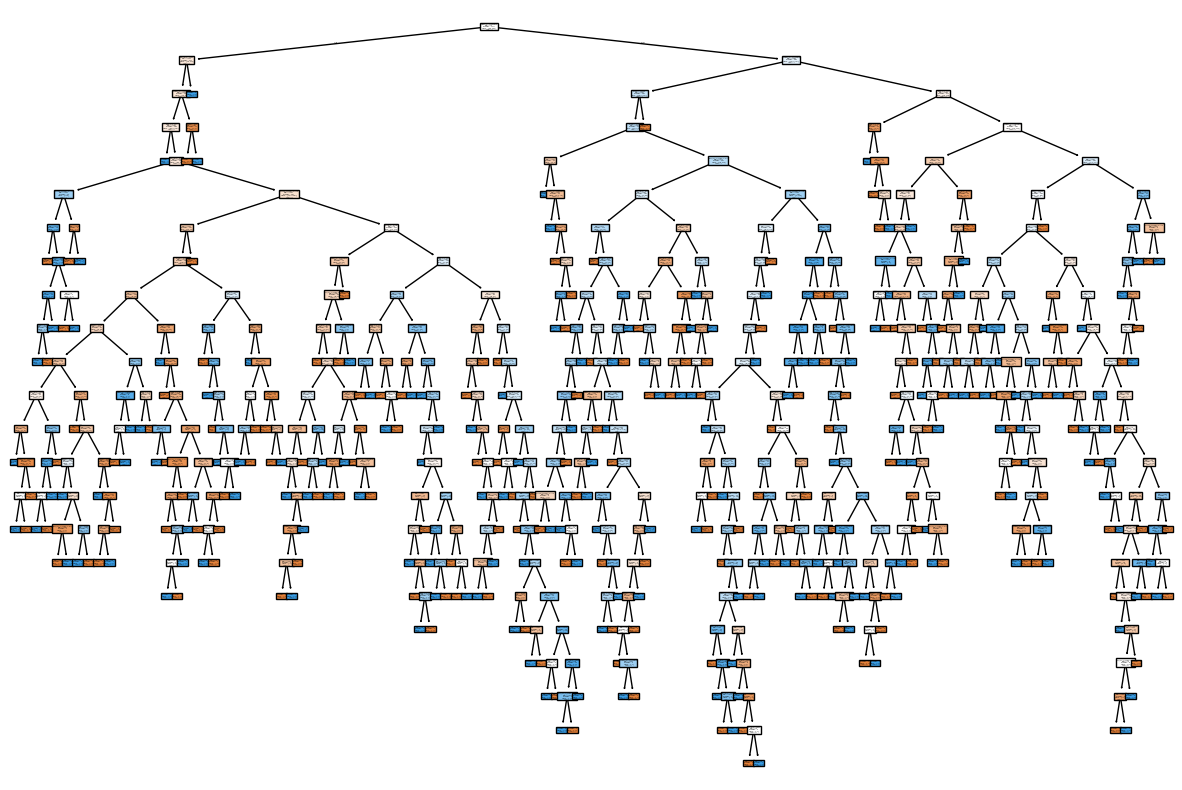

In [23]:
# 画图
plt.figure(figsize=(15, 10))    # 保证绘制的决策树足够大，节点和文字不会重叠
tree.plot_tree(
    clf,    # 训练好的决策树模型
    feature_names=X.columns,    # 显示每个节点分裂的特征名称
    class_names=[str(c) for c in clf.classes_], # 将分类标签转换成字符串，显示在叶子节点
    filled=True # 用颜色填充节点，颜色深浅表示类别分布或纯度
)
plt.show()

2. 决策树分类器——1

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# ---------------- 读取数据 ----------------
file_name = "D:/MyProject/MatContest/dataset/raw/yf2014_2018.csv" # 定义要读取的 CSV 文件路径
dataset1 = pd.read_csv(file_name)
dataset1.head()  # 显示前五行数据

,Close,High,Low,Open,Volume
0,3.95,3.98,3.84,3.85,20548400
1,4.00,4.00,3.88,3.98,22887200
2,4.13,4.18,3.99,4.01,42398300
3,4.18,4.25,4.11,4.19,42932100
4,4.18,4.26,4.14,4.23,30678700


In [26]:
dataset1['Increase/Decrease'] = np.where(dataset1['Volume'].shift(-1) > dataset1['Volume'],1,0)
dataset1['Buy_Sell_on_Open'] = np.where(dataset1['Open'].shift(-1) > dataset1['Open'],1,-1)
dataset1['Buy_Sell'] = np.where(dataset1['Close'].shift(-1) > dataset1['Close'],1,-1)
dataset1['Return'] = dataset1['Close'].pct_change()
dataset1 = dataset1.dropna()
dataset1['Up_Down'] = np.where(dataset1['Return'].shift(-1) > dataset1['Return'],'Up','Down')
dataset1.head()

,Close,High,Low,Open,Volume,Increase/Decrease,Buy_Sell_on_Open,Buy_Sell,Return,Up_Down
1,4.00,4.00,3.88,3.98,22887200,1,1,1,0.012658,Up
2,4.13,4.18,3.99,4.01,42398300,1,1,1,0.032500,Down
3,4.18,4.25,4.11,4.19,42932100,0,1,-1,0.012106,Down
4,4.18,4.26,4.14,4.23,30678700,0,-1,-1,0.000000,Down
5,4.09,4.23,4.05,4.20,30667600,0,-1,1,-0.021531,Up


In [28]:
dataset1.shape

(1170, 10)

In [29]:
X1 = dataset1.drop(['Up_Down'], axis=1)
y1 = dataset1['Up_Down']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.20,random_state=0)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [31]:
y_pred = classifier.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[100  19]
 [ 19  96]]
              precision    recall  f1-score   support

        Down       0.84      0.84      0.84       119
          Up       0.83      0.83      0.83       115

    accuracy                           0.84       234
   macro avg       0.84      0.84      0.84       234
weighted avg       0.84      0.84      0.84       234



In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_matrix

array([[100,  19],
       [ 19,  96]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

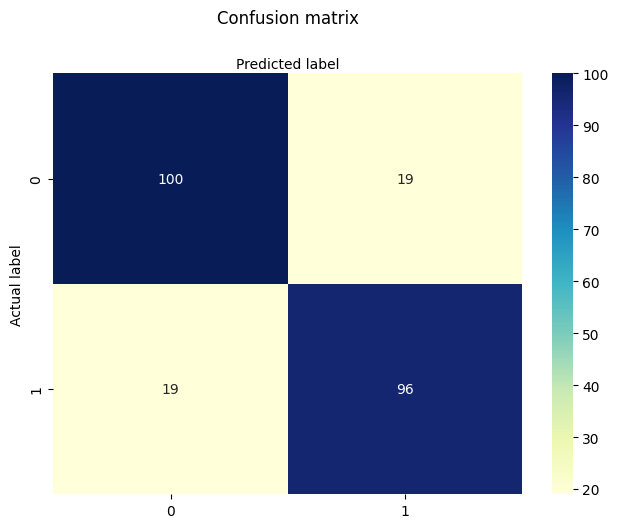

In [34]:

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8376068376068376


3. 决策树分类器——2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# ---------------- 读取数据 ----------------
file_name = "D:/MyProject/MatContest/dataset/raw/yf2014_2018.csv" # 定义要读取的 CSV 文件路径
dataset2 = pd.read_csv(file_name)
dataset2.head()  # 显示前五行数据

,Close,High,Low,Open,Volume
0,3.95,3.98,3.84,3.85,20548400
1,4.00,4.00,3.88,3.98,22887200
2,4.13,4.18,3.99,4.01,42398300
3,4.18,4.25,4.11,4.19,42932100
4,4.18,4.26,4.14,4.23,30678700


In [5]:
'''
总结这一段代码的作用：
    根据成交量、开盘价、收盘价计算下一步涨跌信号（1/-1）或趋势（Up/Down）。
    计算每日收益率。
    删除首尾可能出现的缺失值。
    查看处理后的数据结构。

用作后面的目标变量————用于表示下一行是否上涨、收益率趋势、成交量变化
'''
# 比较下一行的成交量是否大于当前行
# 只“读取下一行数据”来做比较或计算，并没有改变行顺序
# 结果存入新列 Increase_Decrease，表示“成交量是否增加”
dataset2['Increase_Decrease'] = np.where(dataset2['Volume'].shift(-1) > dataset2['Volume'], 1, 0)

# 下一行开盘价是否高于当前行 —— 下一天的开盘价是否高于今天
# 高于则标记为 1（买入信号），低于则标记为 -1（卖出信号）
# 存入新列 Buy_Sell_on_Open
dataset2['Buy_Sell_on_Open'] = np.where(dataset2['Open'].shift(-1) > dataset2['Open'],1,-1)

# 下一行收盘价是否高于当前行
# 存入新列 Buy_Sell，表示“下一行收盘价涨跌信号”
dataset2['Buy_Sell'] = np.where(dataset2['Close'].shift(-1) > dataset2['Close'],1,-1)

# 计算收盘价的 百分比变化率： (当前收盘价 - 前一收盘价) / 前一收盘价
# 存入新列 Return，表示每日收益率
dataset2['Return'] = dataset2['Close'].pct_change()

# 将 Return 列向上移动一行，比较下一行收益率是否大于当前行收益率
# 存入新列 Up_Down，表示“收益率涨跌趋势”
dataset2['Up_Down'] = np.where(dataset2['Return'].shift(-1) > dataset2['Return'],'Up','Down')

# 删除 含有 NaN 值的行
# 主要是因为前面使用了 shift() 和 pct_change()，会在首尾产生 NaN
dataset2 = dataset2.dropna()

dataset2.head()

,Close,High,Low,Open,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Return,Up_Down
1,4.00,4.00,3.88,3.98,22887200,1,1,1,0.012658,Up
2,4.13,4.18,3.99,4.01,42398300,1,1,1,0.032500,Down
3,4.18,4.25,4.11,4.19,42932100,0,1,-1,0.012106,Down
4,4.18,4.26,4.14,4.23,30678700,0,-1,-1,0.000000,Down
5,4.09,4.23,4.05,4.20,30667600,0,-1,1,-0.021531,Up


In [6]:
'''
    对价格和成交量的变化做标记

    用作后面的特征
'''
# 比较下一行开盘价是否大于当前行
# 高——Up，低于——Down
# 类似地，对 High、Low、Close 列也生成对应的涨跌标记：
# 下一行价格高 → 'Up'
# 下一行价格低 → 'Down'
# 分别存入新列 High_N、Low_N、Close_N。
dataset2['Open_N'] = np.where(dataset2['Open'].shift(-1) > dataset2['Open'],'Up','Down')
dataset2['High_N'] = np.where(dataset2['High'].shift(-1) > dataset2['High'],'Up','Down')
dataset2['Low_N'] = np.where(dataset2['Low'].shift(-1) > dataset2['Low'],'Up','Down')
dataset2['Close_N'] = np.where(dataset2['Close'].shift(-1) > dataset2['Close'],'Up','Down')
# 对成交量列 Volume 做同样的比较：
# 下一行成交量大 → 'Positive'
# 下一行成交量小或持平 → 'Negative'
# 存入新列 Volume_N。
dataset2['Volume_N'] = np.where(dataset2['Volume'].shift(-1) > dataset2['Volume'],'Positive','Negative')
dataset2.head()

,Close,High,Low,Open,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Return,Up_Down,Open_N,High_N,Low_N,Close_N,Volume_N
1,4.00,4.00,3.88,3.98,22887200,1,1,1,0.012658,Up,Up,Up,Up,Up,Positive
2,4.13,4.18,3.99,4.01,42398300,1,1,1,0.032500,Down,Up,Up,Up,Up,Positive
3,4.18,4.25,4.11,4.19,42932100,0,1,-1,0.012106,Down,Up,Up,Up,Down,Negative
4,4.18,4.26,4.14,4.23,30678700,0,-1,-1,0.000000,Down,Down,Down,Down,Down,Negative
5,4.09,4.23,4.05,4.20,30667600,0,-1,1,-0.021531,Up,Down,Down,Up,Up,Negative


In [8]:
dataset2.shape

(1170, 15)

In [26]:
'''
    X2 —— 输入特征（开盘价 + 上涨/下降标记 + 成交量涨跌标记）
    y2 —— 预测目标（下一行收益率涨跌 'Up'/'Down'）
'''
X2 = dataset2[['Open', 'Open_N', 'Volume_N']].values # 使用 .values 转换成 NumPy 数组，存入 X2，用于机器学习模型输入
y2 = dataset2['Up_Down']

In [27]:
# 导入preprocessing模块，用于数据预处理
from sklearn import preprocessing

# 创建一个 LabelEncoder 对象 le_Open，用于将分类标签转换为数字
le_Open = preprocessing.LabelEncoder()
# 定义 'Up' 对应一个整数 0（因为Up放在前面）
# 'Down' 对应 1
le_Open.fit(['Up','Down'])
# 把 X2 中的第二列（原本 'Up'/'Down'）转换为数字（例如 'Up'→1, 'Down'→0），并覆盖原列
X2[:,1] = le_Open.transform(X2[:,1])

# 对Positive、Negative列做编码
le_Volume = preprocessing.LabelEncoder()
# 定义 'Positive' 和 'Negative' 对应的整数
le_Volume.fit(['Positive', 'Negative'])
# 把第三列（成交量涨跌标记）转换为数字
X2[:,2] = le_Volume.transform(X2[:,2])

In [29]:
# 将特征 X2 和目标 y2 划分为 训练集 和 测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.20, random_state=0)

In [30]:
from sklearn.tree import DecisionTreeClassifier
# 创建一个决策树分类器对象 classifier
# 没有传入任何参数，使用默认配置
# 默认分裂标准: gini基尼不纯度
# 默认不限制树的深度，会生长到完全拟合训练集
# 其他参数也全为默认值
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [31]:
# 创建一个决策树分类器对象 Up_Down_Tree
# criterion="entropy"：使用 信息熵（Entropy）作为分裂标准，而不是默认的基尼不纯度（Gini）
# max_depth=4：限制决策树最大深度为 4 层，防止树过深导致过拟合
Up_Down_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Up_Down_Tree

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [32]:
Up_Down_Tree.fit(X_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [33]:
# 使用 已定义的决策树对象 Up_Down_Tree 对测试集特征 X_test 进行预测
# 根据决策树的分裂规则，对每一行特征输出一个预测类别（Up 或 Down）
# 预测结果存入 predTree，是一个 数组，长度与 X_test 样本数相同
predTree = Up_Down_Tree.predict(X_test)

In [34]:
# 查看模型预测值与真实标签的前几条样本，方便做快速验证和调试
print(predTree[0:5]) # 打印预测结果 predTree 的前五个元素
print(y_test[0:5]) # 打印真实目标 y_test 的前五个元素

['Down' 'Up' 'Up' 'Up' 'Down']
904      Up
874    Down
597      Up
329      Up
426    Down
Name: Up_Down, dtype: object


In [35]:
# Evaluation
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.6581196581196581


In [36]:
# Accuracy Score without Sklearn
boolian = (y_test==predTree)
accuracy = sum(boolian)/y_test.size
accuracy

0.6581196581196581

In [37]:
# 用默认分类器
predict_norm= classifier.predict(X_test)
print(predict_norm[0:5])
print(y_test[0:5])


['Up' 'Down' 'Up' 'Up' 'Down']
904      Up
874    Down
597      Up
329      Up
426    Down
Name: Up_Down, dtype: object


In [38]:
from sklearn import metrics

print("使用默认分类器的结果是:", metrics.accuracy_score(y_test, predict_norm))
# 默认分类器的树太深了，在训练集上过拟合了，泛化能力不强

使用默认分类器的结果是: 0.5811965811965812


4. 决策树分类器——3

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# ---------------- 读取数据 ----------------
file_name = "D:/MyProject/MatContest/dataset/raw/yf2014_2018.csv" # 定义要读取的 CSV 文件路径
dataset3 = pd.read_csv(file_name)
dataset3.head()  # 显示前五行数据

,Close,High,Low,Open,Volume
0,3.950000048,3.980000019,3.839999914,3.849999905,20548400
1,4.0,4.0,3.880000114,3.980000019,22887200
2,4.130000114,4.179999828,3.99000001,4.010000229,42398300
3,4.179999828,4.25,4.110000134,4.190000057,42932100
4,4.179999828,4.260000229,4.139999866,4.230000019,30678700


In [41]:
dataset3['Open_Close'] = (dataset3['Open'] - dataset3['Close'])/dataset3['Open']
dataset3['High_Low'] = (dataset3['High'] - dataset3['Low'])/dataset3['Low']
dataset3['Increase_Decrease'] = np.where(dataset3['Volume'].shift(-1) > dataset3['Volume'],1,0)
dataset3['Buy_Sell_on_Open'] = np.where(dataset3['Open'].shift(-1) > dataset3['Open'],1,0)
dataset3['Buy_Sell'] = np.where(dataset3['Close'].shift(-1) > dataset3['Close'],1,0)
dataset3['Returns'] = dataset3['Close'].pct_change()
dataset3 = dataset3.dropna()
dataset3.head()

,Close,High,Low,Open,Volume,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
1,4.0,4.0,3.880000114,3.980000019,22887200,-0.005025120830282031,0.03092780476139955,1,1,1,0.012658215542381113
2,4.130000114,4.179999828,3.99000001,4.010000229,42398300,-0.02992515664517194,0.04761900188566655,1,1,1,0.03250002850000011
3,4.179999828,4.25,4.110000134,4.190000057,42932100,0.002386689466338612,0.034063226626649096,0,1,0,0.012106467946697785
4,4.179999828,4.260000229,4.139999866,4.230000019,30678700,0.011820376069837678,0.02898559586571734,0,0,0,0.0
5,4.090000153,4.230000019,4.050000191,4.199999809,30667600,0.026190395476753763,0.04444439987928894,0,0,1,-0.02153102361323822


In [43]:
X3 = dataset3[['Open', 'High', 'Low', 'Volume', 'Close','Returns']].values
y3 = dataset3['Buy_Sell'].values

In [45]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

model = DecisionTreeClassifier()

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.50, random_state=0)
sss.get_n_splits(X3, y3)


5

In [46]:
cm_sum = np.zeros((2,2))

In [47]:
for train_index, test_index in sss.split(X3, y3):
    X_train, X_test = X3[train_index], X3[test_index]
    y_train, y_test = y3[train_index], y3[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_sum = cm_sum + cm

In [48]:
print('\nDecision Tree Algorithms')
print('\nConfusion Matrix')
print('_'*20)
print('     Predicted')
print('     pos neg')
print('pos: %i %i' % (cm_sum[1,1], cm_sum[0,1]))
print('neg: %i %i' % (cm_sum[1,1], cm_sum[0,1]))


Decision Tree Algorithms

Confusion Matrix
____________________
     Predicted
     pos neg
pos: 748 736
neg: 748 736


In [49]:
from sklearn.metrics import accuracy_score

print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Accuracy Score Normalized: ',accuracy_score(y_test, y_pred, normalize=False))

Accuracy Score:  0.5111111111111111
Accuracy Score Normalized:  299.0


Decision Tree Regression 决策树回归
* 用途：用于 预测连续数值，而不是分类。
* 输入：特征向量 X（可以是数值型或类别型特征）。
* 输出：一个连续数值 y。

工作原理：
* 决策树会根据特征将数据划分成不同的叶节点。
* 每个叶节点的输出是 该叶节点样本的平均值。
* 树的分裂依然使用“最大化信息增益”或“最小化方差”的原则。

例子：
* 预测房价（连续值）
* 预测股票收益率（连续值）

vs 线性回归

决策树回归
* 非参数模型，无需假设输入与输出的关系是线性的
* 树叶输出该叶节点样本的均值，分裂非线性
*
* 能拟合任意非线性关系，对特征间复杂关系敏感
* 对异常值较敏感（可能生成深树过拟合）
* 可以处理多输出（直接把 y 当二维数组传入即可）

多元线性回归
* 只能拟合线性关系，对非线性关系表现差
* 对异常值敏感（容易影响回归系数）
* 标准 MLR 只支持单输出，但可以通过多元回归扩展到多输出

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# ---------------- 读取数据 ----------------
file_name = "D:/MyProject/MatContest/dataset/raw/yf2014_2018.csv" # 定义要读取的 CSV 文件路径
dataset_r = pd.read_csv(file_name)
dataset_r.head()  # 显示前五行数据
dataset_r.shape

(1171, 5)

In [78]:
# Create more data
dataset_r['Increase_Decrease'] = np.where(dataset_r['Volume'].shift(-1) > dataset_r['Volume'],1,0)
dataset_r['Buy_Sell_on_Open'] = np.where(dataset_r['Open'].shift(-1) > dataset_r['Open'],1,-1)
dataset_r['Buy_Sell'] = np.where(dataset_r['Close'].shift(-1) > dataset_r['Close'],1,-1)
dataset_r['Return'] = dataset_r['Close'].pct_change()
dataset_r = dataset_r.dropna()
dataset_r.head()

,Close,High,Low,Open,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Return
1,4.0,4.0,3.880000114,3.980000019,22887200,1,1,1,0.012658215542381113
2,4.130000114,4.179999828,3.99000001,4.010000229,42398300,1,1,1,0.03250002850000011
3,4.179999828,4.25,4.110000134,4.190000057,42932100,0,1,-1,0.012106467946697785
4,4.179999828,4.260000229,4.139999866,4.230000019,30678700,0,-1,-1,0.0
5,4.090000153,4.230000019,4.050000191,4.199999809,30667600,0,-1,1,-0.02153102361323822


In [79]:
dataset_r.shape

(1170, 9)

In [80]:
X = dataset_r.drop(['Close'], axis=1)
y = dataset_r['Close']

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [82]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [83]:
y_pred = regressor.predict(X_test)

In [84]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print(df.head())
print(df.tail())

         Actual   Predicted
904 13.11999989 12.97000027
874 14.38000011 14.28999996
597 3.789999962 3.869999886
329 2.299999952 2.339999914
426  2.00999999 2.089999914
          Actual   Predicted
830  13.10999966        13.0
46   3.849999905 3.819999933
1136 16.61000061 16.31999969
1041 11.72000027 11.88000011
1166 19.97999954 19.42000008


In [85]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.10371794013247859
Mean Squared Error: 0.0333269268370079
Root Mean Squared Error: 0.18255664007920364


In [86]:
print(y_test.shape)
print(y_pred.shape)

(234,)
(234,)


Decision Tree for Multioutput Regression（多输出回归决策树）

用途：当一个样本有 多个连续输出变量 时使用。

输入：特征向量X

输出：多个连续值y1,y2,y3,...ym

工作原理：
* 每个叶节点保存每个输出变量的平均值向量。
* 树在划分时会综合考虑所有输出变量的方差来决定最优分裂。
例子：
* 房屋数据预测：[房价, 房屋面积, 税费] 三个连续值
* 股票数据预测：[下一天开盘价, 收盘价, 成交量]

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# ---------------- 读取数据 ----------------
file_name = "D:/MyProject/MatContest/dataset/raw/yf2014_2018.csv" # 定义要读取的 CSV 文件路径
dataset_m = pd.read_csv(file_name)
dataset_m.head()  # 显示前五行数据

,Close,High,Low,Open,Volume
0,3.950000048,3.980000019,3.839999914,3.849999905,20548400
1,4.0,4.0,3.880000114,3.980000019,22887200
2,4.130000114,4.179999828,3.99000001,4.010000229,42398300
3,4.179999828,4.25,4.110000134,4.190000057,42932100
4,4.179999828,4.260000229,4.139999866,4.230000019,30678700


In [65]:
# 成交量是否涨了
dataset_m['Increase_Decrease'] = np.where(dataset_m['Volume'].shift(-1) > dataset_m['Volume'],1,0)
# 开盘价是否涨了
dataset_m['Buy_Sell_on_Open'] = np.where(dataset_m['Open'].shift(-1) > dataset_m['Open'],1,0)
# 收盘价是否涨了
dataset_m['Buy_Sell'] = np.where(dataset_m['Close'].shift(-1) > dataset_m['Close'],1,0)
# 计算收盘价变化率，即收益率
dataset_m['Returns'] = dataset_m['Close'].pct_change()
dataset_m = dataset_m.dropna()

In [66]:
dataset_m.tail()

,Close,High,Low,Open,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
1166,19.97999954,20.07999992,19.35000038,19.79000092,62983200,0,1,1,0.01062210799766472
1167,20.39999962,20.42000008,19.86000061,19.97999954,55629000,1,1,1,0.02102102550899243
1168,20.89999962,20.92000008,20.20999908,20.28000069,62002700,1,1,1,0.02450980437812378
1169,22.29000092,22.31999969,21.13999939,21.19000053,113444100,1,1,1,0.0665072404436724
1170,23.97999954,24.0,22.67000008,22.90999985,164328200,0,0,0,0.07581868776342793


In [67]:
X = dataset_m.drop(['Open'], axis=1)
Y = dataset_m[['Close', 'Open']]

In [68]:
print(X.shape, Y.shape)

(1170, 8) (1170, 2)


In [69]:
from sklearn.tree import DecisionTreeRegressor
# 决策树会根据特征划分样本，叶节点输出该叶节点样本的平均值作为预测结果
model = DecisionTreeRegressor()
model.fit(X, Y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [70]:
'''
数值型列：
    count：非空值数量
    mean：平均值
    std：标准差
    min：最小值
    25%、50%、75%：四分位数
    max：最大值

'''
print(dataset_r.describe()) # 生成 数据统计摘要


                  Close              High               Low              Open  \
count            1169.0            1169.0            1169.0            1169.0   
mean  7.005372108902481 7.149341324969204 6.857964070435416 7.003926430631309   
std   4.862894422236093 4.954781198770117 4.755285944046151 4.856892845874689   
min         1.620000005       1.690000057       1.610000014       1.620000005   
25%         2.700000048       2.779999971       2.660000086       2.710000038   
50%          4.28000021       4.349999905       4.179999828              4.25   
75%         11.55000019       11.77999973       11.31000042       11.57999992   
max         23.97999954              24.0       22.67000008       22.90999985   

                 Volume   Increase_Decrease   Buy_Sell_on_Open  \
count            1169.0              1169.0             1169.0   
mean    37646324.465355  0.4542343883661249  0.504704875962361   
std   33565676.44509769 0.49811420041883464 0.5001918494799172   
min   

'\n数值型列：\n    count：非空值数量\n    mean：平均值\n    std：标准差\n    min：最小值\n    25%、50%、75%：四分位数\n    max：最大值\n\n'

In [71]:
# input the data_in based on statistics
# 定义一个 输入样本 data_in，它是一个列表，包含 8 个特征值
data_in = [23.98, 22.91, 7.00, 7.00, 1.62, 1.62, 4.27, 4.25]
# 使用之前训练好的 决策树回归模型 model 对输入样本进行预测
# predict() 需要二维数组 [样本数, 特征数]，所以用 [data_in] 将列表包装成二维数组（1 行 8 列）
yhat = model.predict([data_in])

In [72]:
# summarize prediction
print(yhat[0])
# 打印预测值 yhat 的第一个元素。
# 因为你只预测了一个样本，所以 yhat 通常是一个长度为 1 的数组 [预测值]，取 [0] 得到标量输出。
# 输出的是 回归模型预测的连续数值

[12.02999973 11.27000046]


In [73]:
model.score(X, Y)
# 调用 回归模型的 .score() 方法 来评估模型在给定数据上的性能。
# 对于回归模型，score() 默认返回 R² 决定系数

1.0